In [1]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

# colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다.
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

In [4]:
train_generator = train_datagen.flow_from_directory(
       'train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.


In [5]:
#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 120 images belonging to 2 classes.


In [13]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [10]:
#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [11]:
#모델을 실행합니다
history = model.fit_generator(
       train_generator,
       steps_per_epoch=30,  #적절한 값으로 조절합니다.
       epochs=50,   #적절한 값으로 조절합니다.
       validation_data=test_generator,
       validation_steps=10)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


30/30 [==============================] - 6s 176ms/step - loss: 0.7067 - accuracy: 0.4400 - val_loss: 0.6985 - val_accuracy: 0.4200
Epoch 2/50
30/30 [==============================] - 5s 167ms/step - loss: 0.6878 - accuracy: 0.5867 - val_loss: 0.6827 - val_accuracy: 0.5200
Epoch 3/50
30/30 [==============================] - 5s 166ms/step - loss: 0.6917 - accuracy: 0.5267 - val_loss: 0.6830 - val_accuracy: 0.6200
Epoch 4/50
30/30 [==============================] - 5s 168ms/step - loss: 0.6830 - accuracy: 0.5400 - val_loss: 0.6773 - val_accuracy: 0.6000
Epoch 5/50
30/30 [==============================] - 5s 167ms/step - loss: 0.6775 - accuracy: 0.5733 - val_loss: 0.6992 - val_accuracy: 0.4400
Epoch 6/50
30/30 [==============================] - 5s 167ms/step - loss: 0.6649 - accuracy: 0.6267 - val_loss: 0.6755 - val_accuracy: 0.4600
Epoch 7/50
30/30 [==============================] - 5s 168ms/step - loss: 0.6284 - accuracy: 0.6067 - val_loss: 0.5651 - val_accuracy: 0.7800
Epoch 8/50
30/30 

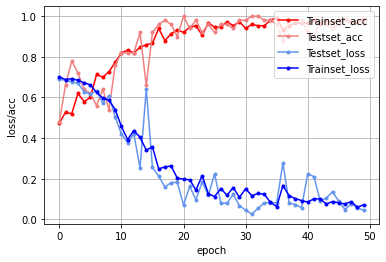

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
       'train',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       'test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 120 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

history = finetune_model.fit_generator(
       train_generator,
       steps_per_epoch=30,
       epochs=50,
       validation_data=test_generator,
       validation_steps=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
30/30 [==============================] - 38s 1s/step - loss: 0.4149 - accuracy: 0.8533 - val_loss: 0.5240 - val_accuracy: 0.7500
Epoch 2/50
30/30 [==============================] - 38s 1s/step - loss: 0.3052 - accuracy: 0.9133 - val_loss: 0.2206 - val_accuracy: 0.9000
Epoch 3/50
30/30 [==============================] - 38s 1s/step - loss: 0.2605 - accuracy: 0.9267 - val_loss: 0.5257 - val_accuracy: 0.7500
Epoch 4/50
30/30 [==============================] - 38s 1s/step - loss: 0.2162 - accuracy: 0.9400 - val_loss: 0.1614 - val_accuracy: 0.9500
Epoch 5/50
30/30 [==============================] - 38s 1s/step - loss: 0.1592 - accuracy: 0.9600 - val_loss: 0.1175 - val_accuracy: 1.0000
Epoch 6/50
30/30 [==============================] - 38s 1s/step - loss: 0.1456 - accuracy: 0.9600 - val_loss: 0.1246 - val_accuracy: 0.9500
Epoch 7/50
30/30 [==============================] - 38s 1s/step - loss: 0.1421 - accuracy: 0.9667 - val_loss: 0.1139 - val_accuracy: 0.9500
Epoch 8/50
30/30 [==

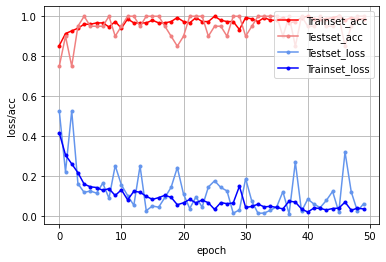

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()